In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import seaborn as sns
%matplotlib inline

In [4]:
iris = sns.load_dataset('iris')

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


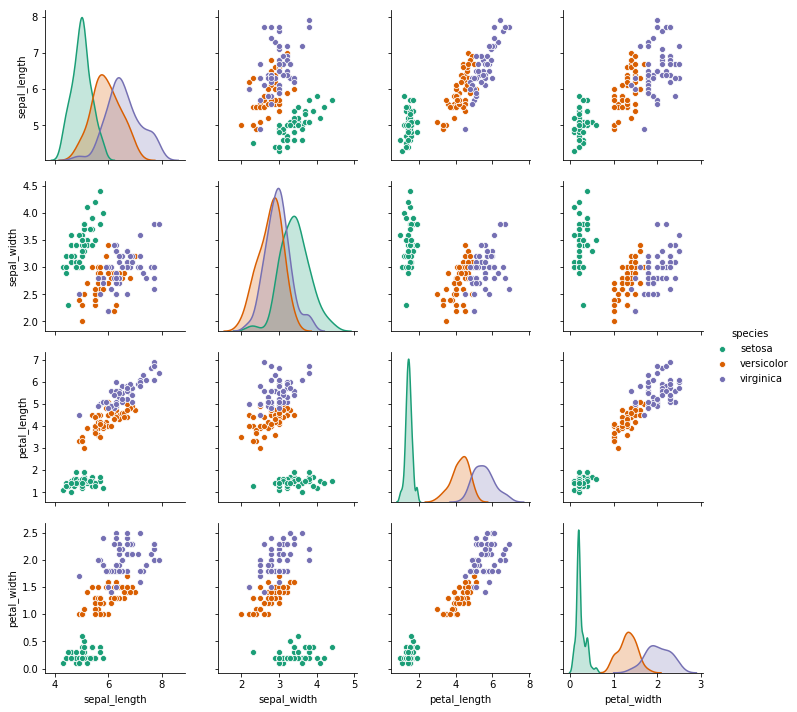

In [10]:
sns.pairplot(iris,hue='species',palette='Dark2')

In [12]:
from sklearn.cross_validation import train_test_split

In [27]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [37]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
33,5.5,4.2,1.4,0.2
16,5.4,3.9,1.3,0.4
43,5.0,3.5,1.6,0.6
129,7.2,3.0,5.8,1.6
50,7.0,3.2,4.7,1.4
123,6.3,2.7,4.9,1.8
68,6.2,2.2,4.5,1.5
53,5.5,2.3,4.0,1.3
146,6.3,2.5,5.0,1.9
1,4.9,3.0,1.4,0.2


In [28]:
from sklearn.svm import SVC

In [29]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
pred = svc_model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
print confusion_matrix(y_test,pred)
print '\n'
print classification_report(y_test,pred)

[[15  0  0]
 [ 0 22  0]
 [ 0  0 13]]


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      1.00      1.00        22
  virginica       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        50



In [22]:
from sklearn.grid_search import GridSearchCV

In [23]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [24]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] ...................................... C=100, gamma=0.01 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................................... C=100, gamma=0.001 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................................... C=100, gamma=0.001 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................................... C=100, gamma=0.001 -   0.0s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [25]:
grid_prediction = grid.predict(X_test)

In [26]:
print confusion_matrix(y_test,grid_prediction)
print '\n'
print classification_report(y_test,grid_prediction)

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       1.00      1.00      1.00        15
  virginica       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        50

